# GD 03. Augmentation
* 대규모의 데이터셋을 만드는데는 많은 노력과 비용이 필요하다.
* 크롤링을 통해 구축한다 해도 조건에 따라 사진을 제외하면 원하는 만큼의 데이터를 구하기는 더욱 어려워진다.

### Data Augmentation
* 가지고 있는 데이터셋을 여러 가지 방법으로 증강(Augment)시켜 실질적인 학습 데이터셋의 규모를 키울 수 있는 방법이다.
* Augmentation을 사용할 때의 이점은 다음과 같다.
  * 많은 데이터를 통해 **과적합을 방지할 수 있다.**
  * 가지고 있는 데이터가 실제 상황에서의 입력값과 다를 경우 **실제 입력값과 비슷한 데이터 분포를 만들 수 있다**
* 이렇듯 Data Augmentation을 통해 데이터를 늘릴 뿐 아니라 모델이 실제 테스트 환경에서 잘 동작할 수 있도록 도와준다.

### 이미지 데이터 Augmentation
* 이미지 데이터에 대한 Augmentation은 포토샵, SNS의 사진 필터, 각종 카메라 앱에서 발견할 수 있는 기능들과 비슷하다.

### 이미지 Augmentation 방법
#### Flipping
* 이미지를 상하 또는 좌우로 반전시키는 방법
* 분류 문제에서는 문제가 없을 수 있지만, Detection, Segmentation 문제 등 정확한 정답영역이 존재하는 문제에 적용할 때에는 라벨도 같이 좌우 반전을 해주어야 한다.
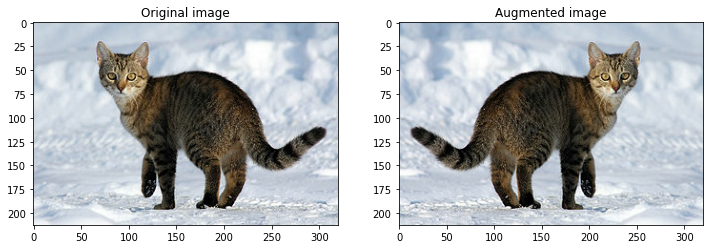

#### Gray scale
* RGB 이미지를 하나의 채널을 가지도록 만든다.
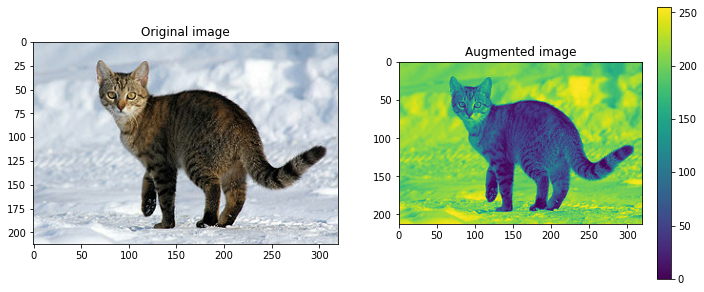

#### Saturation
* RGB 이미지를 HSV(Hue(색조), Saturation(채도), Value(명도)의 3가지 성분으로 색을 표현) 이미지로 변경하고, S(Saturation) 채널에 오프셋(offset)을 적용, 이미지를 더 선명하게 만들어준다.
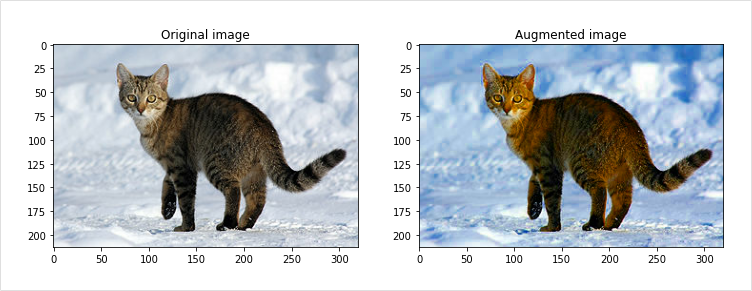

#### Brightness
* RGB에서 (255, 255, 255)가 흰색을 나타내는 것을 이용해 밝기를 조정한다.
* 전체 RGB 채널에서 값을 더해주거나 빼주면서 밝기를 높이거나 낮출 수 있다.
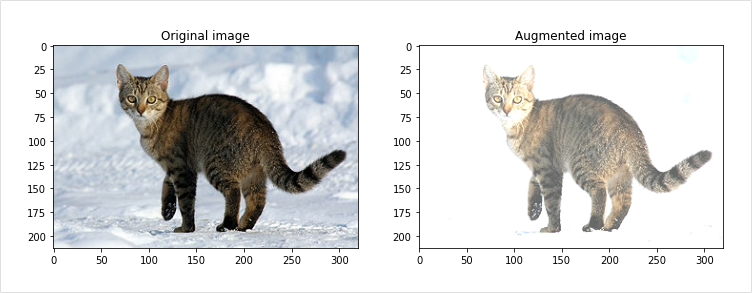

#### Rotation
* 이미지의 각도를 변환한다.
* 90도 회전의 경우 직사각형 형태가 유지되기 때문에 이미지의 크기만 조절해주면 바로 사용할 수 있으나 다른 각도의 경우 직사각형 형태에서 기존 이미지로 채우지 못하는 영역을 어떻게 처리해야 할 지 유의해야 한다.
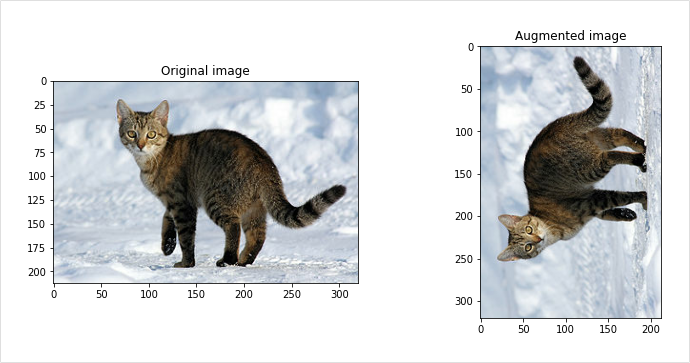

#### Center Crop
* 이미지의 중앙을 기준으로 확대하는 방법이다.
* 본래 가진 Label과 맞지 않을 정도로 작게 Crop하지 않는 것이 좋다.
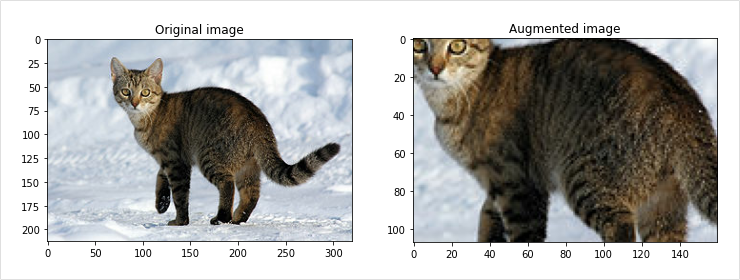

#### 그 외
위에서 소개한 Augmentation 기법 이외에도 Gaussian noise, Contrast change, Sharpen, Affine transformation, Padding, Blurring 등 더욱 다양한 기법이 있다.

## Image Data Augmentation 실습

### (1) 데이터 준비

In [1]:
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import os

sample_img_path = os.getenv('HOME')+'/aiffel/data_augmentation/images/mycat.jpg'
sample_img_path

'/aiffel/aiffel/data_augmentation/images/mycat.jpg'

### (2) Image Resize

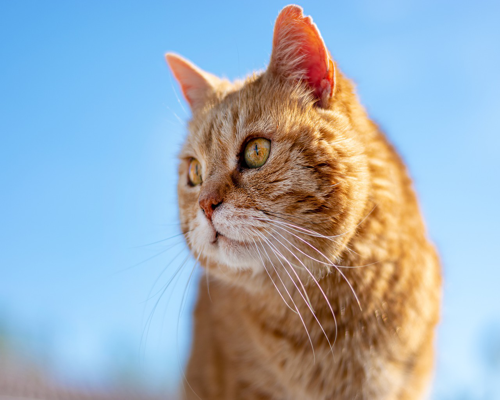

In [2]:
image = Image.open(sample_img_path).resize((500,400))
image_tensor = tf.keras.preprocessing.image.img_to_array(image)

image

### (3) Flip 적용
* Flip은 flip_left_right와 flip_up_down 두 가지로 좌우, 상하 반전을 사용할 수 있다.

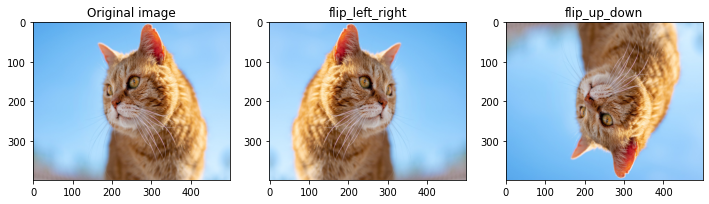

In [3]:
flip_lr_tensor = tf.image.flip_left_right(image_tensor)
flip_ud_tensor = tf.image.flip_up_down(image_tensor)
flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)

plt.figure(figsize=(12,12))

plt.subplot(1,3,1)
plt.title('Original image')
plt.imshow(image)

plt.subplot(1,3,2)
plt.title('flip_left_right')
plt.imshow(flip_lr_image)

plt.subplot(1,3,3)
plt.title('flip_up_down')
plt.imshow(flip_ud_image)

plt.show()

#### random_flip
* 반전이 되지 않은 원본 데이터도 활용하기 위해 확률에 따라 반전되도록 적용한다.

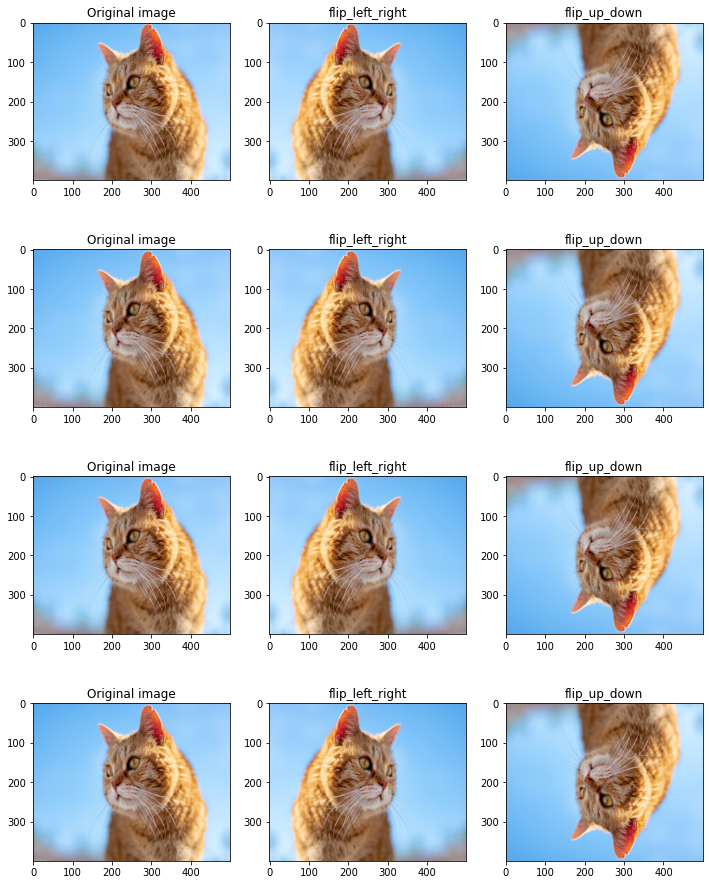

In [4]:
plt.figure(figsize=(12,16))

row = 4
for i in range(row):
    flip_lr_tensor = tf.image.flip_left_right(image_tensor)
    flip_ud_tensor = tf.image.flip_up_down(image_tensor)
    flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
    flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)
    
    plt.subplot(4, 3, i*3+1)
    plt.title('Original image')
    plt.imshow(image)
    
    plt.subplot(4, 3, i*3+2)
    plt.title('flip_left_right')
    plt.imshow(flip_lr_image)
    
    plt.subplot(4, 3, i*3+3)
    plt.title('flip_up_down')
    plt.imshow(flip_ud_image)

### (4) Center Crop
* 중앙을 기준으로 자를 이미지를 사용하는 기법
* 단순히 중심점을 기준으로 사진을 확대하는 것이 아닌, 얼마나 확대할지를 조절하는 매개변수인 central_fraction을 통해 얼마나 확대할지 조절한다.

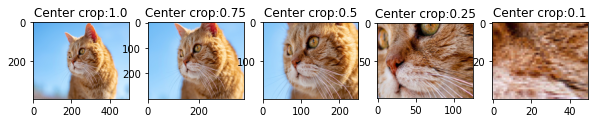

In [6]:
plt.figure(figsize=(12,15))

central_fractions = [1.0, 0.75, 0.5, 0.25, 0.1]
col = len(central_fractions)
for i, frac in enumerate(central_fractions):
    cropped_tensor = tf.image.central_crop(image_tensor,frac)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.title(f'Center crop:{frac}')
    plt.imshow(cropped_img)

#### 랜덤하게 central_crop을 적용하는 함수 만들기

In [8]:
def random_central_crop(image_tensor, range=(0,1)):
    central_fraction = tf.random.uniform([1], minval=range[0], maxval=range[1], dtype=tf.float32)
    cropped_tensor = tf.image.central_crop(image_tensor, central_fraction)
    return cropped_tensor

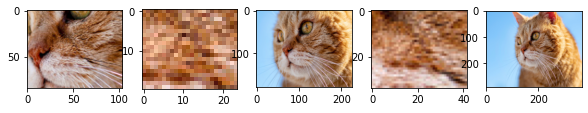

In [9]:
plt.figure(figsize=(12,15))

col = 5
for i, frac in enumerate(central_fractions):
    cropped_tensor = random_central_crop(image_tensor)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1, col+1, i+1)
    plt.imshow(cropped_img)

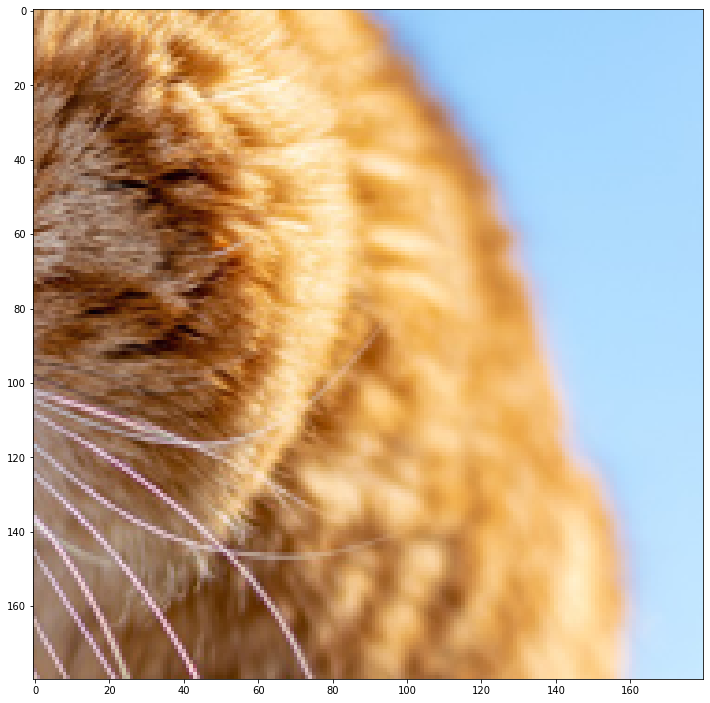

In [10]:
plt.figure(figsize=(12,15))

random_crop_tensor = tf.image.random_crop(image_tensor, [180, 180, 3])
random_crop_image = tf.keras.preprocessing.image.array_to_img(random_crop_tensor)

plt.imshow(random_crop_image)
plt.show()

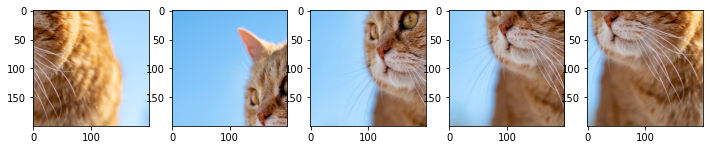

In [14]:
plt.figure(figsize=(12, 15))

for i in range(5):
    random_crop_tensor = tf.image.random_crop(image_tensor,[200,200,3])
    random_crop_image = tf.keras.preprocessing.image.array_to_img(random_crop_tensor)
    plt.subplot(1,5,i+1)
    plt.imshow(random_crop_image)

### (5) Brightness
* tf.image.random_brightness()만 적용할 경우 이미지 텐서값의 범위가 0~255를 초과하게 될 수도 있다. 
* 이 경우 plt.imshow()에서 rescale되어 발기 변경 효과가 상쇄되어 보일 수 있다.
* 따라서 tf.image.random_brightness() 다음에는 tf.clip_by_value() 를 적용해 주어야 한다.


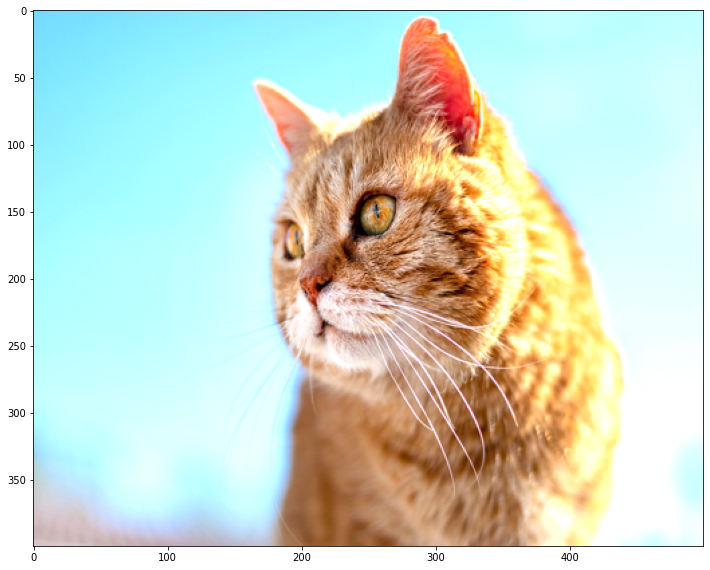

In [15]:
plt.figure(figsize=(12,15))

random_bright_tensor = tf.image.random_brightness(image_tensor, max_delta=128)
random_bright_tensor = tf.clip_by_value(random_bright_tensor, 0, 255)
random_bright_image = tf.keras.preprocessing.image.array_to_img(random_bright_tensor)

plt.imshow(random_bright_image)
plt.show()

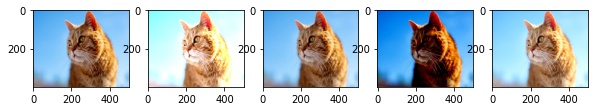

In [16]:
plt.figure(figsize=(12, 15))

col = 5
for i in range(5):
    random_bright_tensor = tf.image.random_brightness(image_tensor, max_delta=128)
    random_bright_tensor = tf.clip_by_value(random_bright_tensor, 0, 255)
    random_bright_image = tf.keras.preprocessing.image.array_to_img(random_bright_tensor)

    plt.subplot(1,col+1,i+1)
    plt.imshow(random_bright_image)

## imgaug 라이브러리
* augmentation만을 모아서 제공하는 전문 라이브러리 중 하나
* 정답 데이터는 원본 데이터의 augmentation에 따라 같이 변화되어야 함.
* imgaug에서는 배열을 이미지의 기본 형태로 사용한다.
* PIL Image 데이터형을 넘파이 배열로 변환해야 한다.

In [17]:
import numpy as np
import imgaug.augmenters as iaa

image_arr = np.array(image)
image_arr.shape

(400, 500, 3)

### (1) iaa.Affine()
* 아핀 변환(Affine transform)을 이미지에 적용하는 함수
* 2D 변환의 일종으로 이미지의 스케일을 조절하거나 평행이동, 회전 등의 변화를 줄 수 있다.

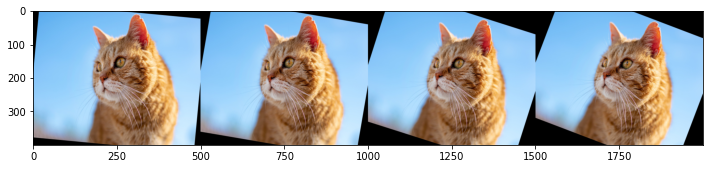

In [18]:
images = [image_arr, image_arr, image_arr, image_arr]

rotate = iaa.Affine(rotate=(-25, 25))
images_aug = rotate(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

### (2) iaa.Crop()
* 앞서 사용했던 Crop 기법을 적용해 본다.

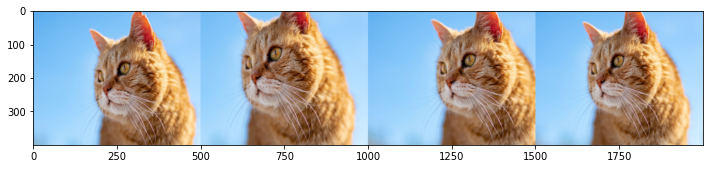

In [19]:
images = [image_arr, image_arr, image_arr, image_arr]

crop = iaa.Crop(percent=(0,0.2))
images_aug = crop(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

### (3) iaa.Sequential()
* 여러 가지의 augmentation 기법을 순차적으로 적용한다.

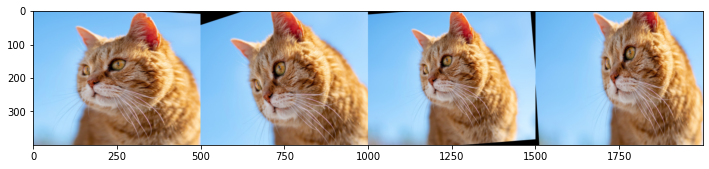

In [20]:
images = [image_arr, image_arr, image_arr, image_arr]

rotate_crop = iaa.Sequential([
    iaa.Affine(rotate=(-25,25)),
    iaa.Crop(percent=(0,0.2))
])
images_aug = rotate_crop(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

* random으로 기법들의 순서를 바꾸어 사용할 수도 있다.

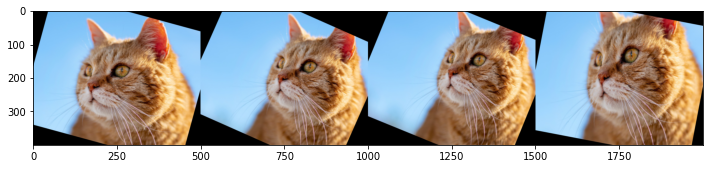

In [21]:
images = [image_arr, image_arr, image_arr, image_arr]

rotate_crop = iaa.Sequential([
    iaa.Crop(percent=(0, 0.2)),
    iaa.Affine(rotate=(-25, 25)),
], random_order=True)
images_aug = rotate_crop(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

### (4) iaa.OneOf()
* 여러 augmentation 기법들 중 하나를 선택하도록 한다.

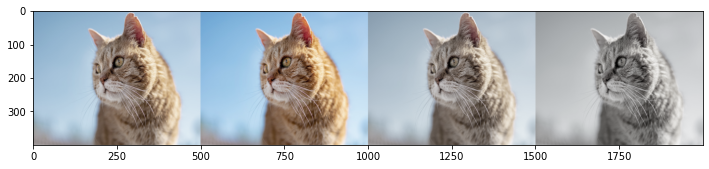

In [23]:
images = [image_arr, image_arr, image_arr, image_arr]

seq = iaa.OneOf([
     iaa.Grayscale(alpha=(0.0, 1.0)),
     iaa.AddToSaturation((-50, 50))
])
images_aug = seq(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

### (5) iaa.Sometimes()
* augmentation이 일정 확률로 선택이 되게 하는 기능

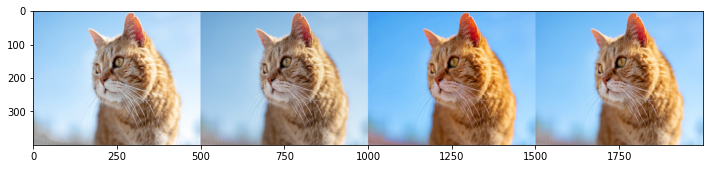

In [24]:
images = [image_arr, image_arr, image_arr, image_arr]

seq = iaa.Sequential([
     iaa.Sometimes(
         0.6,
         iaa.AddToSaturation((-50, 50))
     ),
     iaa.Sometimes(
         0.2,
         iaa.Grayscale(alpha=(0.0, 1.0))
     )
])
images_aug = seq(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

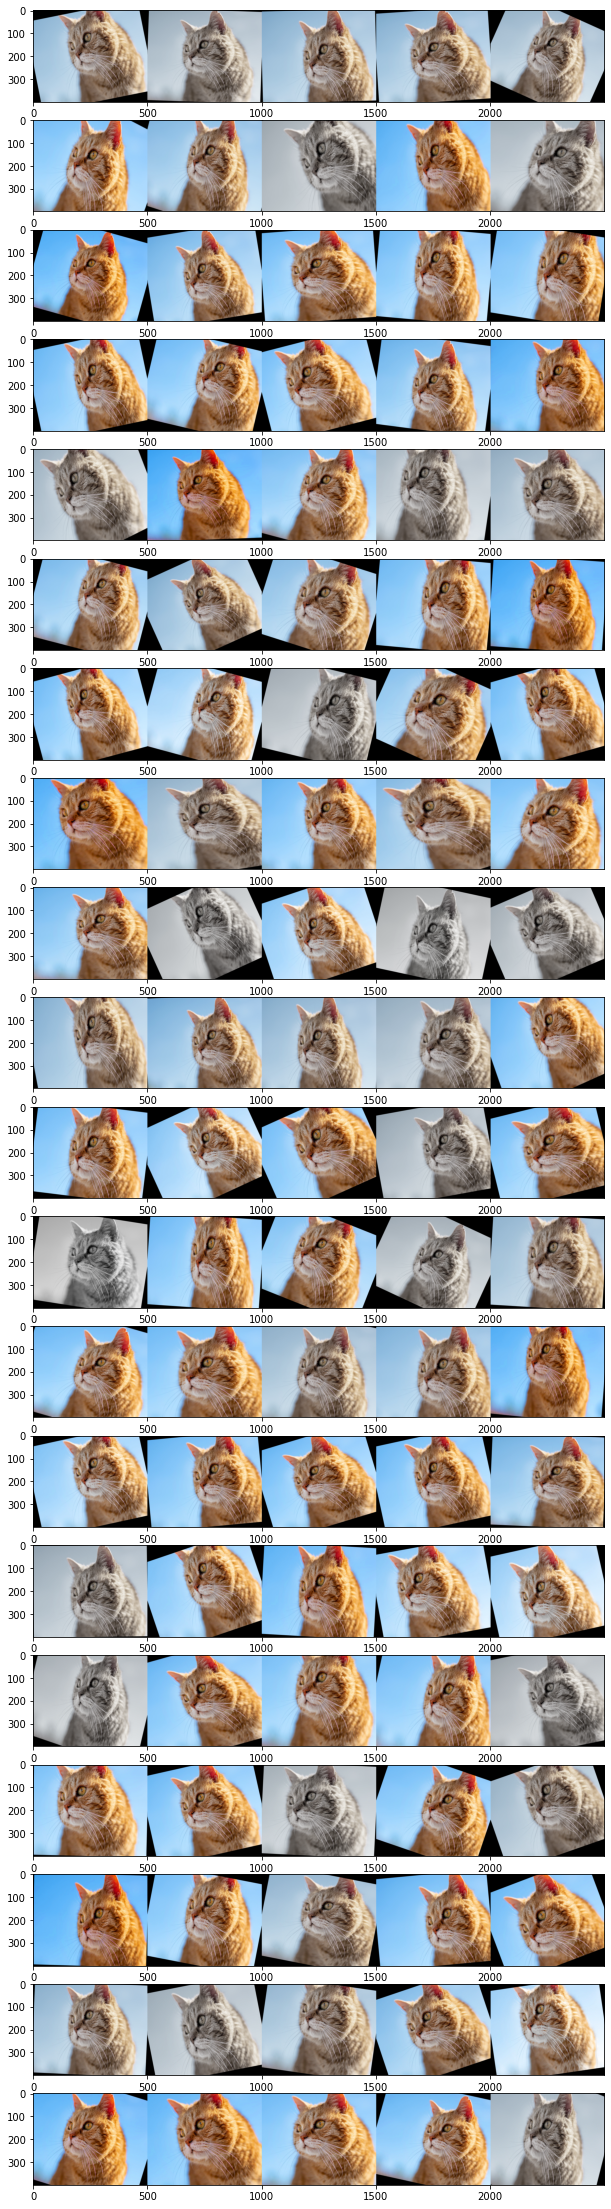

In [25]:
seq = iaa.Sequential([
    iaa.OneOf([
         iaa.Grayscale(alpha=(0.0, 1.0)),
         iaa.Sometimes(
             0.5,
             iaa.AddToSaturation((-50, 50))
         )
    ]),
    iaa.Sequential([
        iaa.Crop(percent=(0, 0.2)),
        iaa.Affine(rotate=(-25, 25)),
    ], random_order=True)
])

plt.figure(figsize=(12, 40))
for i in range(20):
    images = [image_arr, image_arr, image_arr, image_arr, image_arr]
    images_aug = seq(images=images)
    plt.subplot(20,1,i+1)
    plt.imshow(np.hstack(images_aug))
    
plt.show()